**Assignment 1, Due 9/26**

## About
In this assignment, you will gain experience implementing a linear model, a neural network, and a deep neural network using TensorFlow 2.0. 

* You will use two different development styles. I thought it’d be helpful for you to see both of these early (if you’re familiar with them, you can branch out to any major framework that exist today). 

* Along the way, you'll add code to visualize the weights of a linear model, and provide your own implementation of softmax (so you learn to extend the built-in functionality right off the bat).

This assignment has several parts, plan ahead and get started early (and come to office hours if you’re stuck, the TAs and I are happy to help). Most concepts will be covered in lecture two, just posting it early.

## Instructions

Complete the code in this notebook by searching for the text **"TODO"**.

## Submission instructions

Please submit this assignment on CourseWorks by uploading a Jupyter notebook that includes saved output. If you are working in Colab, you can prepare your notebook for submission by ensuring that runs end-to-end, then saving and downloading it:

1. ```Runtime -> Restart and run all```
1. ```File -> Save```
1. ```File -> Download.ipynb```

## Resources

You can find all the latest tutorials for TensorFlow 2.0 [here](https://www.tensorflow.org/beta). Code examples that will help you with each part of the assignment are linked below.



---



## Setup

### Install TensorFlow 2.0

If you are running this notebook in Colab, the magic command below will install the most recent version. If you prefer working in Jupyter locally, you will need to install TensorFlow 2.0 on your system, using ```!pip install tensorflow==2.0.0-rc0```.

In [1]:
!pip install tensorflow==2.0.0-rc0

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

### Check which TF version is installed
TensorFlow 2.0 is currently under development. It's good practice to check which version you have installed. All the code you'll write in this course will be for version 2.0 (currently in beta).

In [284]:
import tensorflow as tf
print(tf.__version__)
assert tf.__version__.startswith('2')

2.0.0-rc0


In [285]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt

## Part 1: First steps with Sequential models

You will work with the Sequential API in this section. This is the easiest way to develop models with TF 2.0, and is the most common in practice. 

Here are a few code examples that will help you with this part of the assignment:

* [Get started for beginners](https://www.tensorflow.org/beta/tutorials/quickstart/beginner)
* [Classify images](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)
* [Explore overfitting and underfitting](https://www.tensorflow.org/beta/tutorials/keras/overfit_and_underfit)

### Download and prepare a dataset

In [286]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Define, train, and evaluate a linear model

In [287]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4646 - accuracy: 0.8788
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3037 - accuracy: 0.9154
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2661 - accuracy: 0.9255
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2713711060971022, 0.9255]

### 1a: Plot loss and accuracy

**TODO**

Modify the code below to produce plots showing loss and accuracy as a function of epochs on training and validation data (it's fine to use x_test and y_test as validation data for this assignment). To do so, you will need to add validation data to the call for ```model.fit```, and capture the results in a history object. Code for plotting is provided for you, you can pass your history object to this.

![Plot 1](https://storage.googleapis.com/applied-dl/im/a1-1.png)
![Plot 2](https://storage.googleapis.com/applied-dl/im/a1-2.png)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4723 - accuracy: 0.8766 - val_loss: 0.3083 - val_accuracy: 0.9156
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3044 - accuracy: 0.9152 - val_loss: 0.2826 - val_accuracy: 0.9202
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2839 - accuracy: 0.9199 - val_loss: 0.2731 - val_accuracy: 0.9241
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2731 - accuracy: 0.9234 - val_loss: 0.2708 - val_accuracy: 0.9249
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2667 - accuracy: 0.9255 - val_loss: 0.2702 - val_accuracy: 0.9262
Epoch 6/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2627 - accuracy: 0.9274 - val_loss: 0.2668 - val_accuracy: 0.9263
Epoch 7/10
60000/60000 [==============================] 

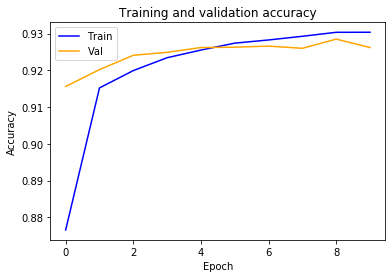

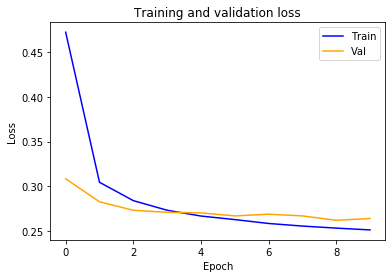

In [288]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

### 1b: Implement a neural network 

**TODO**

Modify the code below to create a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. Train and evaluate your model. How does the accuracy compare with the linear model above? It is not necessary to produce plots for this section.

In [289]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2590 - accuracy: 0.9251 - val_loss: 0.1414 - val_accuracy: 0.9599
Epoch 2/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1135 - accuracy: 0.9668 - val_loss: 0.0957 - val_accuracy: 0.9718
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0873 - val_accuracy: 0.9741
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0579 - accuracy: 0.9825 - val_loss: 0.0768 - val_accuracy: 0.9766
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0836 - val_accuracy: 0.9757
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0367 - accuracy: 0.9879 - val_loss: 0.0777 - val_accuracy: 0.9781
Epoch 7/10
60000/60000 [==============================] 

The validation accuracy of the neural network is 0.9791 after 10 epoches, comparing to 0.9277 in the linear model. Thus, the validation accuracy improved around 5% after switching from linear model to a neural network with one hidden layer.

### 1c: Implement a deep neural network 

**TODO**

Modify the code below to create and train a deep neural network with at least two hidden layers.

In [290]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2269 - accuracy: 0.9330
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0974 - accuracy: 0.9700
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0678 - accuracy: 0.9785
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0516 - accuracy: 0.9841
Epoch 5/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0416 - accuracy: 0.9871


### 1d: Display predictions and their confidence 

**TODO**

1. Choose one of your models above. Use it to make predictions on the entire test set using ```model.predict```

2. Next, identify one image from the testing set the model classifies correctly, and another that it classifies incorrectly. Add code to display these images below, the correct labels, the predicted labels, and the confidence scores.

1. I choose the model in 1c and use it to make predictions

In [329]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2318 - accuracy: 0.9307
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0973 - accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0670 - accuracy: 0.9786
Epoch 4/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0514 - accuracy: 0.9834
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0398 - accuracy: 0.9871


In [387]:
y_pred = model.predict(x_test)
y_pred_class = model.predict_classes(x_test)


2. Identify an image from the testing set the model classifies correctly, and another that it classifies incorrectly.

In [391]:
# Write a function to plot the digits
# Show the predicted label, the confidence score and the true label 
# on X axis
def plot_image(i, pred, true_label, img):
  pred, true_label, img = pred, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap="gray")

  pred_label = np.argmax(pred)
 
  plt.xlabel("{} {:.2f} ({})".format(pred_label,
                                np.max(pred),
                                true_label))

# Write a function to display the distribution of the confidence score
# Red bar represents a wrong prediction, blue bar represents a right prediction
def plot_value_array(i, pred, true_label):
  pred, true_label = pred, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), pred, color="#777777")
  plt.ylim([0, 1])
  pred_label = np.argmax(pred)

  thisplot[pred_label].set_color('red')
  thisplot[true_label].set_color('blue')

To plot a digit that incorrectly classified, write a loop to print out the rows that classified wrong.

In [399]:
# Write a loop to search the rows
for i in range(len(x_test)):
    if y_test[i] != y_pred_class[i]:
        print(i)

151
241
247
259
321
340
381
445
448
495
578
582
613
619
659
720
740
813
829
846
881
895
956
1003
1014
1039
1044
1107
1112
1114
1156
1182
1226
1232
1247
1260
1319
1326
1328
1331
1393
1500
1522
1527
1549
1554
1634
1681
1709
1732
1751
1754
1790
1878
1901
1911
1913
1941
2016
2024
2033
2043
2044
2053
2070
2073
2109
2118
2129
2130
2135
2182
2185
2266
2292
2293
2299
2325
2387
2406
2408
2454
2488
2526
2582
2597
2607
2648
2654
2713
2730
2810
2877
2921
2927
2939
2944
2979
2995
3005
3073
3117
3172
3260
3422
3441
3475
3490
3503
3520
3549
3558
3597
3604
3681
3702
3751
3767
3776
3780
3796
3808
3818
3838
3853
3869
3906
3926
3941
4000
4007
4065
4078
4156
4163
4176
4199
4224
4248
4259
4271
4289
4294
4306
4356
4360
4382
4425
4437
4497
4500
4534
4536
4547
4567
4571
4690
4699
4807
4808
4823
4880
5401
5457
5593
5600
5634
5642
5654
5676
5734
5835
5887
5891
5918
5936
5937
5955
5972
5973
5982
6011
6045
6059
6065
6071
6091
6166
6172
6173
6347
6400
6421
6505
6557
6572
6574
6576
6597
6625
6632
6651
6759
6971
721

Plot one image that incorrectly classified.

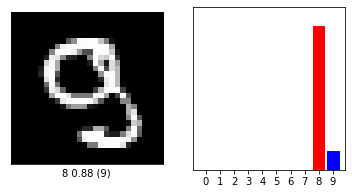

In [392]:
i = 151
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i],  y_test)
plt.show()

Plot one image that correctly classified.

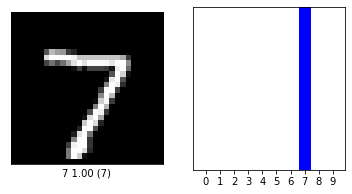

In [397]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i],  y_test)
plt.show()

Also, plot the confusion matrix for summary.

In [81]:
from sklearn.metrics import confusion_matrix 
import itertools

cm = confusion_matrix(y_test, y_pred)

# Write a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


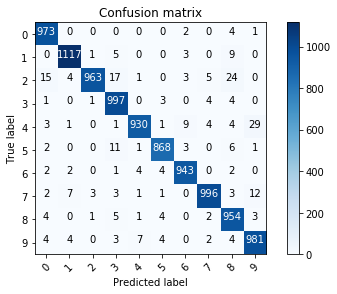

In [82]:
plot_confusion_matrix(cm, classes = range(10))

## Part 2: Subclassed models

In this part of the assignment, you'll work with the Keras Subclassing API. Instead of using a built-in method (```model.fit```) you will train models using a GradientTape.

Here are a few code examples that will help you with this part of the assignment:

* [Get started for experts](https://www.tensorflow.org/beta/tutorials/quickstart/advanced)
* [Tensors and operations](https://www.tensorflow.org/beta/tutorials/eager/basics)
* [Keras overview](https://www.tensorflow.org/beta/guide/keras/overview)

### Download and prepare a dataset
This is similar to the above, except now we'll use ```tf.data``` to batch and shuffle the data, instead of the utilities baked into ```model.fit```. It's not necessary for this assignment, but if you wish, you can learn how to use tf.data [here](https://www.tensorflow.org/beta/tutorials/load_data/images).

In [90]:
# Download a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)

tf.Tensor(8, shape=(), dtype=uint8)


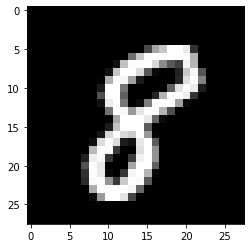

In [91]:
# A quick example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0], plt.get_cmap('gray'))
  print(label[0])

### Define and train a linear model

You may see some warnings running the below code (that's okay, just a matter of TF 2.0 being under active development).

In [92]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [93]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
  print("Epoch {}, Loss: {}".format(epoch, loss))

W0917 16:05:38.959077 4666312128 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 0, Loss: 0.31816935539245605
Epoch 1, Loss: 0.08052796870470047
Epoch 2, Loss: 0.15399426221847534
Epoch 3, Loss: 0.045819420367479324
Epoch 4, Loss: 0.04086124897003174


Note: you may have noticed that the above code runs slowly (it's executing eagerly). Later in this notebook, you will compile your code (to run it in graph mode) using ```@tf.function```. The general workflow is to write your code without using tf.function (as shown above, which makes for easier debugging). Once you've finished debugging your model, you can add ```@tf.function``` for performance if necessary.

### 2a: Visualize the learned weights

We can interpret a linear model by looking at the weights of the fully connected layer. Modify the below code to create a plot similar to the following:

![Plot of weights](https://storage.googleapis.com/applied-dl/im/a1-3.png)

If you find this section tricky, it is not necessary to complete it to continue with the rest of the assignment.


**TODO**

Modify the below code to retrieve the learned weights. You can use either the public API of a model ```model.get_layer(name)``` then retrieve the weights from that, or (because our model is defined using the Subclassing API), you can access the dense layer directly ```model.d1```.

In [122]:
weights, bias = model.get_layer("dense1").get_weights() # get the weights
print(weights.shape)

(784, 10)


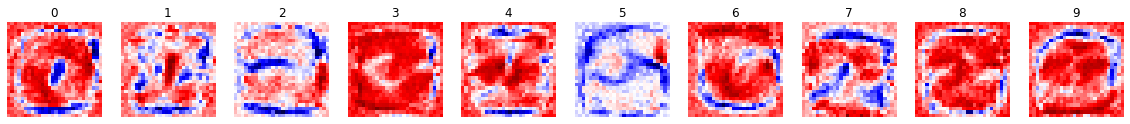

In [138]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # Modify me
  i_weights = weights[:,i] # Select the weights for the i'th output
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('seismic'))
plt.show()

### 2b: Implement a deep neural network

**TODO**

Modify this code to create a deep neural network. Train your model using the code below, and compare the accuracy to the linear model above. 

Note: you do not need to modify any sections other than the model definition. 

The code below uses compiled versions of the training and evaluation loops (remove the ```@tf.function``` annotations if you need to debug).

In [151]:
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.d1 = Dense(128, activation = 'relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyDNN()

In [152]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

These are helper functions we'll use to record loss and accuracy while your model is trained.

In [153]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

This method trains the model on a batch of data.

In [154]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

This method evaluates the model on a batch of data.

In [155]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Training and evaluation loop.

In [156]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.2577281892299652, Accuracy: 92.66999816894531, Test Loss: 0.1365867555141449, Test Accuracy: 95.94000244140625
Epoch 2, Loss: 0.11715850234031677, Accuracy: 96.57833862304688, Test Loss: 0.09844090789556503, Test Accuracy: 96.87999725341797
Epoch 3, Loss: 0.08051804453134537, Accuracy: 97.60833740234375, Test Loss: 0.09727616608142853, Test Accuracy: 96.73999786376953
Epoch 4, Loss: 0.059452854096889496, Accuracy: 98.17500305175781, Test Loss: 0.08030696958303452, Test Accuracy: 97.47999572753906
Epoch 5, Loss: 0.044858768582344055, Accuracy: 98.5999984741211, Test Loss: 0.0809841901063919, Test Accuracy: 97.5


### 2c: Provide your own implementation of softmax and use it to train a model

In your linear model above, the starter code looked similar to: 


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
``` 

Now, create a function:


```
def my_softmax(logits):
  # ...
```

and use it in your model as follows:


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
``` 

Notice, we've removed the built-in activation method on the Dense layer, and added our own to the call method.

Tip: You can implement softmax first using NumPy, if you like, the gradually convert your code to use TensorFlow ops (which begin with tf.\* instead of np.\*).

Notes: 

- Your softmax implementation should be numerically stable. 
- You will need to use tf.* ops in order to use your code to train a model (TF cannot backprop through NumPy operations).

In [283]:
# TODO: your code here
from tensorflow.keras import backend as K

def my_softmax(x): 
    ndim = K.ndim(x)
    if ndim >= 2:
        e = K.exp(x - K.max(x, keepdims=True))
        s = K.sum(e, axis=1, keepdims=True)
        return e / s
    elif ndim == 1:
        e = K.exp(x)
        return e / K.sum(e)
    else:
        raise ValueError('Cannot apply softmax.'
                         'Received input: %s' % x)

class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
  
model = LinearModel()

# TODO
# Add code to train you model, your accuracy should be similar 
# to the linear model.


In [281]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()


# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
  print("Epoch {}, Loss: {}".format(epoch, loss))

Epoch 0, Loss: 0.1310698688030243
Epoch 1, Loss: 0.07304142415523529
Epoch 2, Loss: 0.4225946068763733
Epoch 3, Loss: 0.12282629311084747
Epoch 4, Loss: 0.08066806942224503


In [269]:
scores2D = np.array([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]])

In [282]:
x1 = np.array([[1,2,4,6]])
